In [2]:
#!pip install python-dotenv

In [1]:
#get_raw_data = os.path.join(os.path.pardir,'src','data','get_raw_data.py')
#%%writefile $get_raw_data
import os
import requests
from requests import session
import pandas as pd
import numpy as np
%matplotlib inline

## Getting train data

In [3]:
# -*- coding: utf-8 -*-
train_data = pd.read_csv('../data/raw/train.csv', index_col='PassengerId')
test_data = pd.read_csv('../data/raw/test.csv', index_col='PassengerId')
test_data['Survived'] = -888
all_data = pd.concat((train_data,test_data), axis=0)

C:\Users\Paulius\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [4]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
Survived    418 non-null int64
dtypes: float64(2), int64

# Concatinate both data sets

In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [47]:
all_data.loc[5:10,['Age']]

,Age
PassengerId,
5,35.0
6,NaN
7,54.0
8,2.0
9,27.0
10,14.0


## Filtering

In [56]:
all_data.loc[(all_data.Sex == 'male') & (all_data.Pclass == 1),:]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
24,28.0,A6,S,35.5000,"Sloper, Mr. William Thompson",0,1,male,0,1,113788
28,19.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,1,male,3,0,19950
31,40.0,NaN,C,27.7208,"Uruchurtu, Don. Manuel E",0,1,male,0,0,PC 17601
35,28.0,NaN,C,82.1708,"Meyer, Mr. Edgar Joseph",0,1,male,1,0,PC 17604
36,42.0,NaN,S,52.0000,"Holverson, Mr. Alexander Oskar",0,1,male,1,0,113789
55,65.0,B30,C,61.9792,"Ostby, Mr. Engelhart Cornelius",1,1,male,0,0,113509
56,NaN,C52,S,35.5000,"Woolner, Mr. Hugh",0,1,male,0,1,19947
63,45.0,C83,S,83.4750,"Harris, Mr. Henry Birkhardt",0,1,male,1,0,36973


## Statistics

In [62]:
all_data.describe()
##
#all_data.Fare.quantile(.75)

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


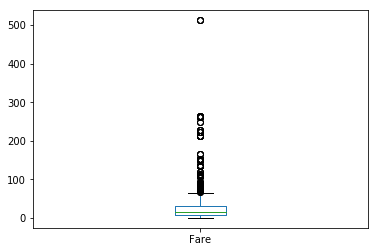

In [68]:

all_data.Fare.plot(kind='box')

## Categorical statistics

In [6]:
all_data.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [78]:
all_data.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [83]:
all_data[all_data.Survived != -888].Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

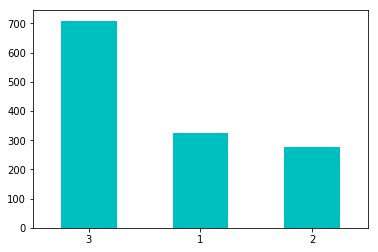

In [85]:
all_data.Pclass.value_counts().plot(kind='bar',rot = 0, color='c')

# Exploring and Processing Data - Part 2

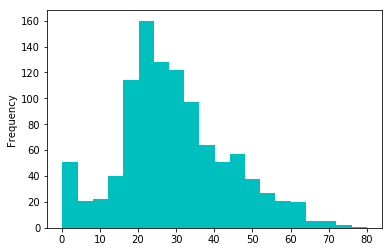

In [87]:
all_data.Age.plot(kind='hist',color='c',bins=20)

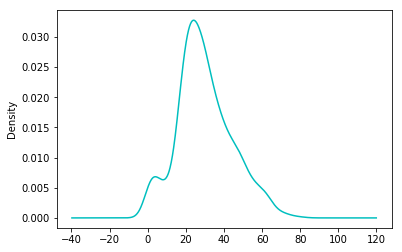

In [90]:
all_data.Age.plot(kind='kde',color='c')

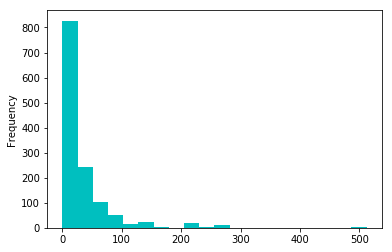

In [95]:
all_data.Fare.plot(kind='hist',color='c',bins=20)

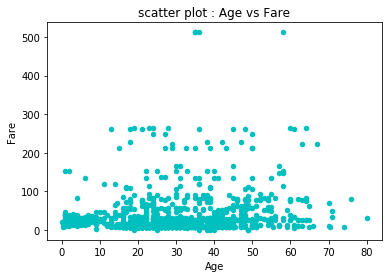

In [99]:
all_data.plot.scatter(x='Age',y='Fare',color='c',title='scatter plot : Age vs Fare')

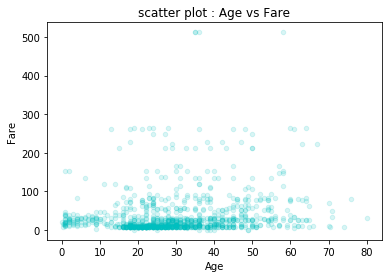

In [101]:
all_data.plot.scatter(x='Age',y='Fare',color='c',title='scatter plot : Age vs Fare',alpha=0.15)

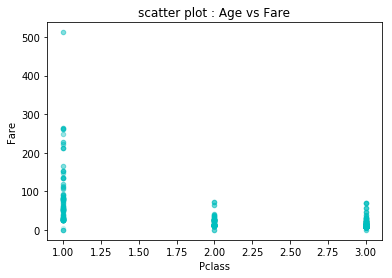

In [103]:
all_data.plot.scatter(x='Pclass',y='Fare',color='c',title='scatter plot : Age vs Fare',alpha=0.15)

## Grouping

In [105]:
all_data.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [107]:
all_data.groupby(['Pclass']).agg({'Fare' : 'mean'})

,Fare
Pclass,
1,87.508992
2,21.179196
3,13.302889


In [109]:
all_data.groupby(['Pclass','Embarked']).Fare.mean()

Pclass  Embarked
1       C           106.845330
        Q            90.000000
        S            72.148094
2       C            23.300593
        Q            11.735114
        S            21.206921
3       C            11.021624
        Q            10.390820
        S            14.435422
Name: Fare, dtype: float64

## Crosstab

In [7]:
pd.crosstab(all_data.Sex,all_data.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


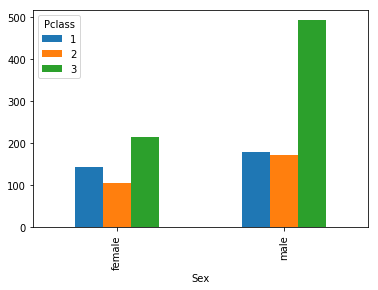

In [9]:
pd.crosstab(all_data.Sex,all_data.Pclass).plot(kind='bar')

## Pivot tables

In [8]:
all_data.pivot_table(index='Sex',columns='Pclass', values='Age',aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [14]:
all_data.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


# Exploring and Processing Data - Part 3

In [36]:
all_data[all_data.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1.0,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1.0,113572


In [25]:
all_data.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [9]:
pd.crosstab(all_data[all_data.Survived != -888].Survived, all_data[all_data.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [10]:
#all_data.loc[all_data.Embarked.isnull(), 'Embarked'] = 'S'
all_data.Embarked.fillna('C',inplace=True)

In [39]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [43]:
all_data[all_data.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,NaN,3701


In [11]:
all_data.loc[(all_data.Embarked == 'S') & (all_data.Pclass == 3),'Fare'].median()

8.05

In [12]:
all_data.Fare.fillna(8.05,inplace=True)

In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [14]:
all_data.groupby('Sex').Age.transform('median')

PassengerId
1       28.0
2       27.0
3       27.0
4       27.0
5       28.0
6       28.0
7       28.0
8       28.0
9       27.0
10      27.0
11      27.0
12      27.0
13      28.0
14      28.0
15      27.0
16      27.0
17      28.0
18      28.0
19      27.0
20      27.0
21      28.0
22      28.0
23      27.0
24      28.0
25      27.0
26      27.0
27      28.0
28      28.0
29      27.0
30      28.0
        ... 
1280    28.0
1281    28.0
1282    28.0
1283    27.0
1284    28.0
1285    28.0
1286    28.0
1287    27.0
1288    28.0
1289    27.0
1290    28.0
1291    28.0
1292    27.0
1293    28.0
1294    27.0
1295    28.0
1296    28.0
1297    28.0
1298    28.0
1299    28.0
1300    27.0
1301    27.0
1302    27.0
1303    27.0
1304    27.0
1305    28.0
1306    27.0
1307    28.0
1308    28.0
1309    28.0
Name: Age, Length: 1309, dtype: float64

In [15]:
def GetTitle(name):
    titles = {
        'mr' : 'Mr',
        'mrs' : 'Mrs',
        'miss' : 'Miss',
        'master': 'Master',
        'don' : 'Sir',
        'rev' : 'Sir',
        'dr' : 'Officer',
        'mme' : 'Mrs',
        'ms' : 'Mrs',
        'major' : 'Officer',
        'lady' : 'Lady',
        'sir' : 'Sir',
        'mlle' : 'Miss',
        'col' : 'Officer',
        'capt' : 'Officer',
        'the countess' : 'Lady',
        'jonkheer' : 'Sir',
        'dona' : 'Lady'
        
    }
    firstname_with_title = name.split(',')[1]
    title = firstname_with_title.split('.')[0]
    title = title.strip().lower()
    return titles[title]



In [16]:
all_data.Name.map(lambda x : GetTitle(x)).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Sir', 'Officer', 'Lady'],
      dtype=object)

In [17]:
all_data['Title'] = all_data.Name.map(lambda x : GetTitle(x))

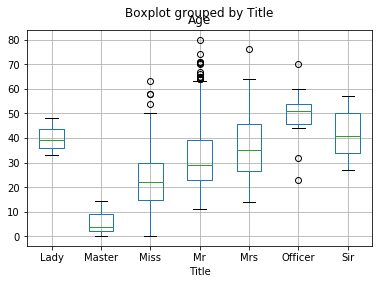

In [19]:
all_data[all_data.Age.notnull()].boxplot('Age','Title')


In [21]:
title_age_median = all_data.groupby('Title').Age.transform('median')
all_data.Age.fillna(title_age_median, inplace=True)

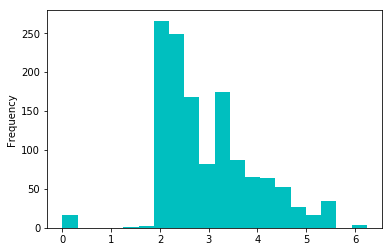

In [22]:
LogFare = np.log(all_data.Fare + 1.0)
LogFare.plot(kind='hist',color='c',bins=20)

In [23]:
#pd.qcut(all_data.Fare, 4)
#pd.qcut(all_data.Fare, 4,labels=['very_low','low','high','very_high']).value_counts()
all_data['Fare_Bin'] =  pd.qcut(all_data.Fare, 4,labels=['very_low','low','high','very_high'])

In [24]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 13 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
Fare_Bin    1309 non-null category
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 134.4+ KB


# Feature Engineering

In [25]:
all_data['AgeState'] = np.where(all_data['Age'] > 18, 'Adult','Child')

In [26]:
all_data.AgeState.value_counts()

Adult    1108
Child     201
Name: AgeState, dtype: int64

## Feature : FamilySize

In [27]:
all_data['FamilySize'] = all_data.Parch + all_data.SibSp + 1

In [28]:
all_data['IsMother'] = np.where(((all_data.Sex == 'Female') & (all_data.Age > 18) & (all_data.Title != 'Miss')), 1,0)

In [113]:
all_data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [40]:
all_data.loc[all_data.Cabin == 'T', 'Cabin'] = np.NaN

In [41]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
all_data['Deck'] = all_data['Cabin'].map(lambda x : get_deck(x))

In [43]:
all_data.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [46]:
pd.crosstab(all_data[all_data.Survived != -888].Survived, all_data[all_data.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [48]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 18 columns):
Age           1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int32
Cabbin        0 non-null float64
Deck          1309 non-null object
dtypes: category(1), float64(3), int32(1), int64(5), object(8)
memory usage: 180.4+ KB


In [49]:
all_data['IsMale'] = np.where(all_data.Sex == 'male',1,0)

In [50]:
all_data = pd.get_dummies(all_data,columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])

In [55]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Age                   1309 non-null float64
Fare                  1309 non-null float64
Survived              1309 non-null int64
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_M

In [53]:
all_data.drop(['Cabin','Name','Cabbin','Sex','Ticket','Parch','SibSp'], axis=1,inplace=True)

In [56]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Age                   1309 non-null float64
Fare                  1309 non-null float64
Survived              1309 non-null int64
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_M

In [62]:
columns = [column for column in all_data.columns if column != 'Survived']

In [63]:
columns = ['Survived'] + columns

In [65]:
columns

['Survived',
 'Age',
 'Fare',
 'FamilySize',
 'IsMother',
 'IsMale',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_Z',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Title_Lady',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Officer',
 'Title_Sir',
 'Fare_Bin_very_low',
 'Fare_Bin_low',
 'Fare_Bin_high',
 'Fare_Bin_very_high',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'AgeState_Adult',
 'AgeState_Child']

In [67]:
all_data = all_data[columns]

In [73]:
all_data.loc[all_data.Survived != -888].to_csv('../data/processed/train_data.csv')
all_data.loc[all_data.Survived == -888].to_csv('../data/processed/test_data.csv')